In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import tensorflow as tf
import numpy as np
import pandas as pd

Importing the Data

In [2]:
data= pd.read_csv('/content/abalone.data', names=['Sex', 'Length', 'Diameter', 'Heoght', 'Whole Weight', 'Shuckled Weight', 'Viscera Weight', 'Shell Weight', 'Rings'])
print(data.head())

  Sex  Length  Diameter  Heoght  Whole Weight  Shuckled Weight  \
0   M   0.455     0.365   0.095        0.5140           0.2245   
1   M   0.350     0.265   0.090        0.2255           0.0995   
2   F   0.530     0.420   0.135        0.6770           0.2565   
3   M   0.440     0.365   0.125        0.5160           0.2155   
4   I   0.330     0.255   0.080        0.2050           0.0895   

   Viscera Weight  Shell Weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


In [180]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4177 non-null   object 
 1   Length           4177 non-null   float64
 2   Diameter         4177 non-null   float64
 3   Heoght           4177 non-null   float64
 4   Whole Weight     4177 non-null   float64
 5   Shuckled Weight  4177 non-null   float64
 6   Viscera Weight   4177 non-null   float64
 7   Shell Weight     4177 non-null   float64
 8   Rings            4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


In [ ]:
data.describe()

,Length,Diameter,Heoght,Whole Weight,Shuckled Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Heoght'}>],
       [<Axes: title={'center': 'Whole Weight'}>,
        <Axes: title={'center': 'Shuckled Weight'}>,
        <Axes: title={'center': 'Viscera Weight'}>],
       [<Axes: title={'center': 'Shell Weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

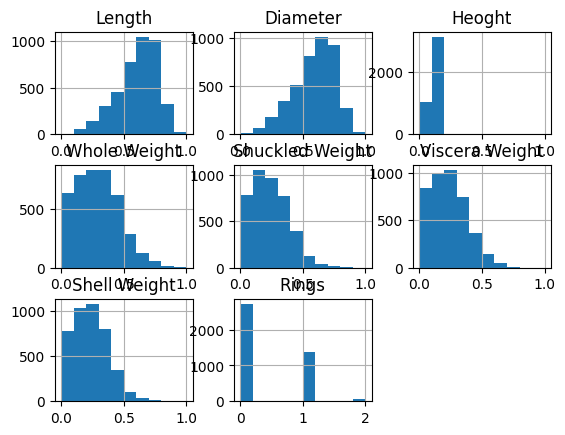

In [ ]:
data.hist()

In [181]:
data['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

#Converting the character 'Sex' to numerical values

In [3]:
sex_data = np.array(data['Sex'])

sex_data[0:5]

array(['M', 'M', 'F', 'M', 'I'], dtype=object)

In [4]:
sex_data[sex_data == 'M'] = 0
sex_data[sex_data == 'F'] = 1
sex_data[sex_data == 'I'] = 2

sex_data[0:5]

array([0, 0, 1, 0, 2], dtype=object)

In [5]:
data['Sex'] = sex_data

In [6]:
data.head()

,Sex,Length,Diameter,Heoght,Whole Weight,Shuckled Weight,Viscera Weight,Shell Weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#Scaling the Data

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [8]:
scal_features = data.columns.tolist()

scal_features.remove('Sex')

for column in data.columns:
  if column!='Sex':
    scal_features.append(column)

data[scal_features]= scaler.fit_transform(data[scal_features])


In [9]:
data.head()

,Sex,Length,Diameter,Heoght,Whole Weight,Shuckled Weight,Viscera Weight,Shell Weight,Rings
0,0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,1,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,2,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


Converting the data into Bins so as to get better fit 

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

rings= np.array( data['Rings'])


transform= KBinsDiscretizer( n_bins=3, encode= 'ordinal', strategy= 'uniform')
rings= np.ravel(transform.fit_transform( rings.reshape( len(rings), 1)))

data['Rings']= rings

# Now, we have just 3 unique ring types [0, 1, 2]

In [11]:
print("Types of Rings : ", np.unique(np.array(data['Rings'])))

Types of Rings :  [0. 1. 2.]


Splitting the Data into X, Y and training and Testing Data

In [12]:
from sklearn.model_selection import train_test_split as tts

train, test= tts( data, train_size=0.7, random_state= 42)

X_train, Y_train= train.iloc[:, :-1].values, train.iloc[:, -1].values
X_test, Y_test= test.iloc[:, :-1].values, test.iloc[:, -1].values 

#**Making the Neural Network**

In [13]:
class NeuralNet(torch.nn.Module):    
    def __init__(self, input_size, hidden_neurons, output_size):
        
        super(NeuralNet, self).__init__()
        self.linear_one = torch.nn.Linear(input_size, hidden_neurons)
        self.linear_two = torch.nn.Linear(hidden_neurons, output_size) 
        self.layer_in = None
        self.act = None
        self.layer_out = None

    def forward(self, x):
        self.layer_in = self.linear_one(x)
        self.act = torch.sigmoid(self.layer_in)
        self.layer_out = self.linear_two(self.act)
        y_pred = torch.sigmoid(self.linear_two(self.act))
        return y_pred

In [14]:
model = NeuralNet(8, 5, 3)

In [15]:
def criterion(y_pred, y):
    out = -1 * torch.mean(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))
    return out
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [16]:
X_train = torch.tensor(np.array(X_train).tolist())
Y_train = torch.tensor(np.array(Y_train).tolist())

In [18]:
# Define the training loop
import matplotlib.pyplot as plt

epochs=50
cost = []
total=0
for epoch in range(epochs):
    total=0
    correct = 0
    incorrect = 0

    epoch = epoch + 1
    for x, y in zip(X_train, Y_train):
        yhat = model(x)
        loss = criterion(yhat, y)

        temp_pred = yhat.detach().numpy()
        temp_orig = y.detach().numpy()

        pred = temp_pred.argmax()
        if pred == temp_orig:
            correct+=1
        else:
            incorrect+=1
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total+=loss.item()
    cost.append(total)
    accuracy = correct/(correct+incorrect)
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' %(epoch, total, accuracy*100))  

Epoch: 1 | Loss: 1715.3629 | Train Accuracy: 33.84
Epoch: 2 | Loss: 1687.5159 | Train Accuracy: 32.36
Epoch: 3 | Loss: 1666.2951 | Train Accuracy: 30.65
Epoch: 4 | Loss: 1649.1174 | Train Accuracy: 29.42
Epoch: 5 | Loss: 1634.6095 | Train Accuracy: 28.40
Epoch: 6 | Loss: 1621.9980 | Train Accuracy: 26.89
Epoch: 7 | Loss: 1610.8355 | Train Accuracy: 25.42
Epoch: 8 | Loss: 1600.8616 | Train Accuracy: 24.36
Epoch: 9 | Loss: 1591.9220 | Train Accuracy: 23.98
Epoch: 10 | Loss: 1583.9143 | Train Accuracy: 23.71
Epoch: 11 | Loss: 1576.7529 | Train Accuracy: 23.95
Epoch: 12 | Loss: 1570.3483 | Train Accuracy: 25.25
Epoch: 13 | Loss: 1564.6002 | Train Accuracy: 26.68
Epoch: 14 | Loss: 1559.3979 | Train Accuracy: 30.04
Epoch: 15 | Loss: 1554.6268 | Train Accuracy: 34.86
Epoch: 16 | Loss: 1550.1749 | Train Accuracy: 38.83
Epoch: 17 | Loss: 1545.9377 | Train Accuracy: 42.25
Epoch: 18 | Loss: 1541.8228 | Train Accuracy: 45.02
Epoch: 19 | Loss: 1537.7504 | Train Accuracy: 46.66
Epoch: 20 | Loss: 153

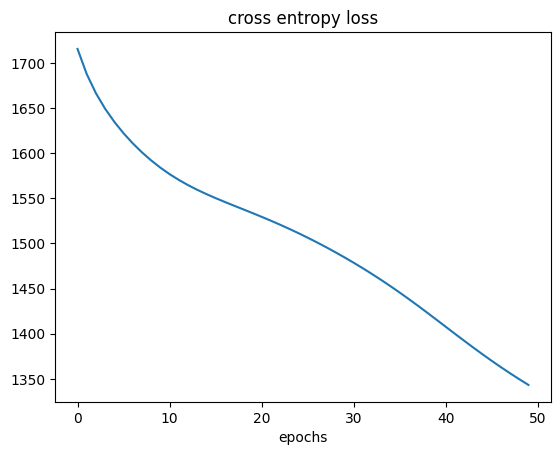

In [19]:
plt.plot(cost)
plt.xlabel('epochs')
plt.title('cross entropy loss')
plt.show()

Testing the Data

In [20]:
X_test = torch.tensor(np.array(X_test).tolist())
Y_test = torch.tensor(np.array(Y_test).tolist())

In [21]:
correct = 0
incorrect = 0

for x, y in zip(X_test, Y_test):
    yhat = model(x)
    
    temp_pred = yhat.detach().numpy()
    temp_orig = y.detach().numpy()
    pred = temp_pred.argmax()
    if pred == temp_orig:
        correct+=1
    else:
        incorrect+=1
accuracy = correct/(correct+incorrect)
print("Accuracy of the model on testing data is : ", accuracy*100)  

Accuracy of the model on testing data is :  21.770334928229666
